In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df = df.iloc[:,2:]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
277,49,88000,1
307,47,113000,1
369,54,26000,1
87,28,85000,0
167,35,71000,0


In [7]:
# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Purchased", axis=1),   # Features (all columns except "Purchased")
    df["Purchased"],                # Target (the "Purchased" column)
    test_size=0.3,                  # 30% data goes to the test set
    random_state=0                  # Ensures reproducibility of the split
)


In [17]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [18]:
# Standard Scalar

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [25]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [26]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [28]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [29]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [30]:
# Effect of Scaling

Text(0.5, 1.0, 'After Scaling')

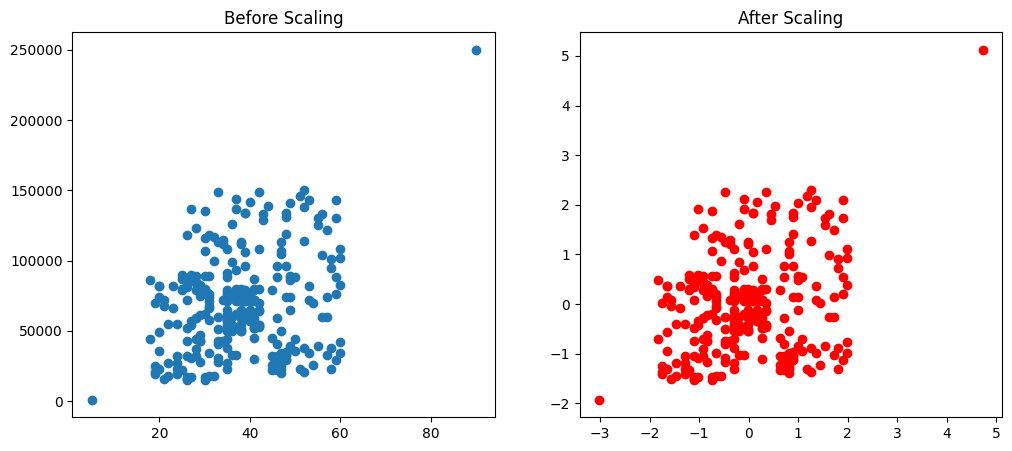

In [87]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color="red")
ax2.set_title("After Scaling")

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

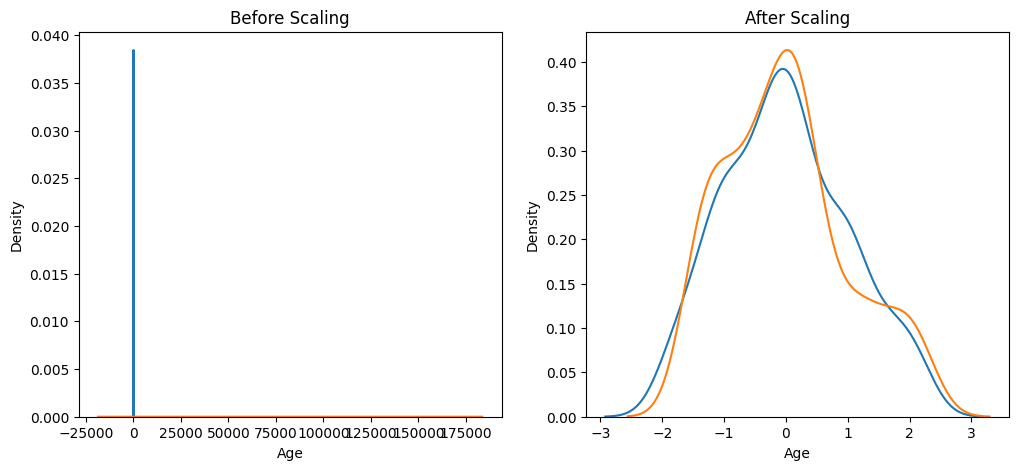

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)

# after scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"], ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2)


In [44]:
# Comparison of Distribution

<Axes: xlabel='Age', ylabel='Density'>

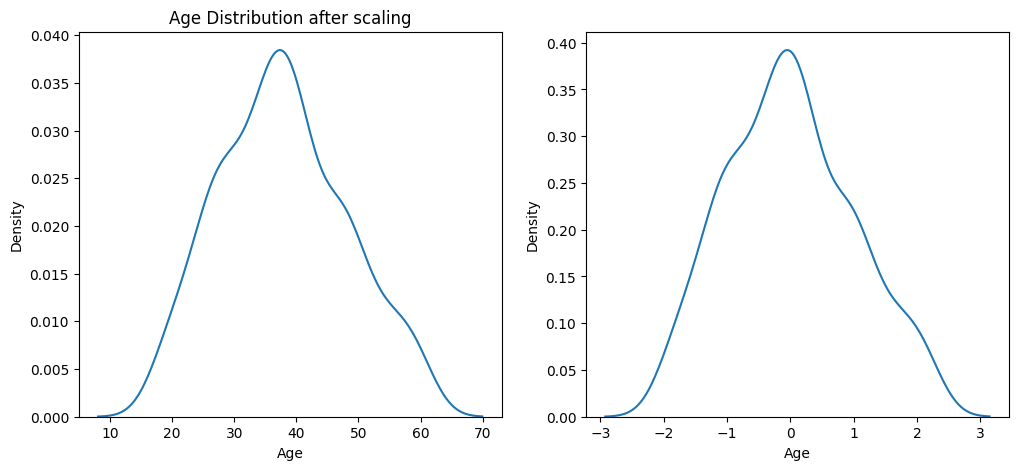

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title("Age Distribution before scaling")
sns.kdeplot(X_train["Age"],ax=ax1)


# after scaling
ax1.set_title("Age Distribution after scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2)


<Axes: title={'center': 'Salary Distribution before scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

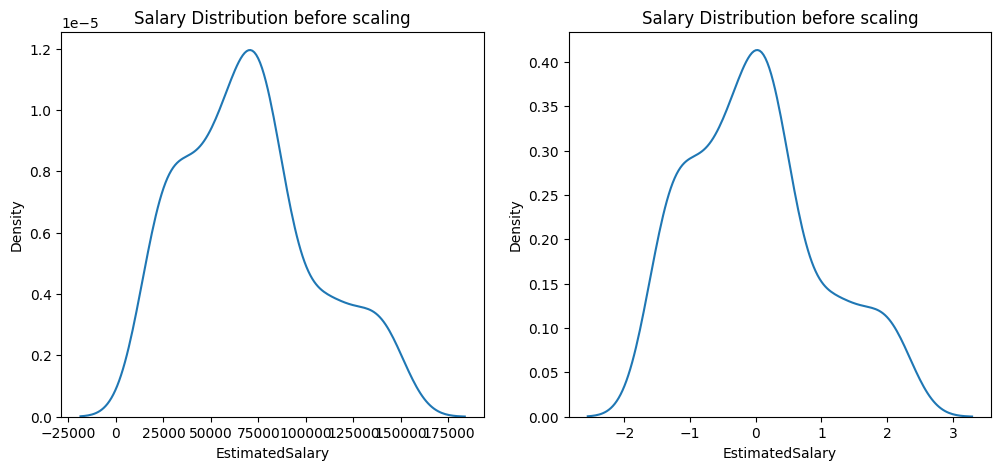

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title("Salary Distribution before scaling")
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)


# after scaling
ax2.set_title("Salary Distribution before scaling")
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2)



In [53]:
# Why Scaling is important?

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [56]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [57]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [62]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [63]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [64]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [65]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [69]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [71]:
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

df = pd.concat([df, new_data], ignore_index=True)


In [72]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


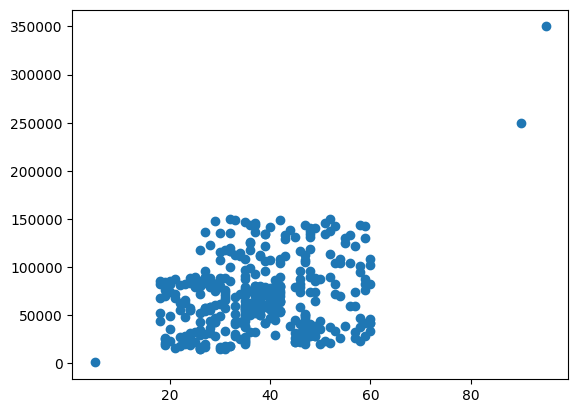

In [73]:
plt.scatter(df["Age"], df["EstimatedSalary"])

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Purchased", axis=1),df["Purchased"], test_size=0.3, random_state=0)

In [77]:
X_train.shape,X_test.shape

((282, 2), (121, 2))

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [80]:
scaler.fit(X_train)

StandardScaler()

In [81]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Text(0.5, 1.0, 'Before Scaling')

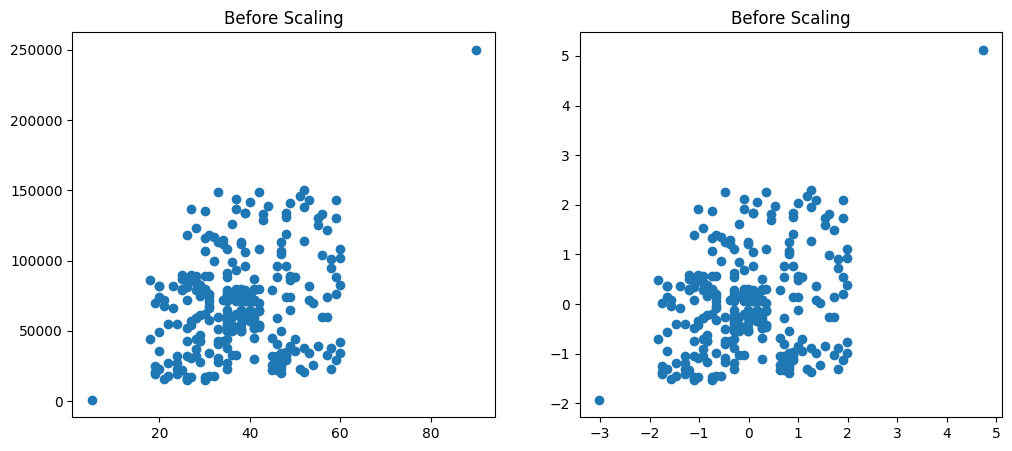

In [86]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train["Age"], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Age"], X_train_scaled['EstimatedSalary'])
ax2.set_title("Before Scaling")